In [58]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [61]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [62]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [63]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
most_recent_sort = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date = most_recent_sort.date
most_recent_date

'2017-08-23'

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#used https://realpython.com/python-datetime/
rec_date_fordt = date.fromisoformat(most_recent_date)

# Calculate the date one year from the last date in data set.
#used https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/
earlier_datedt = rec_date_fordt - timedelta(days = 365)
earlier_date = earlier_datedt.strftime("%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
                   filter(measurement.date >= earlier_date).filter(measurement.date <= most_recent_date).all()
prcp_rows = [{"Date": result[0], "prcp": result[1]} for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_rows).set_index("Date")

# Sort the dataframe by date (dataframe is already sorted by date so I'm putting nothing here)



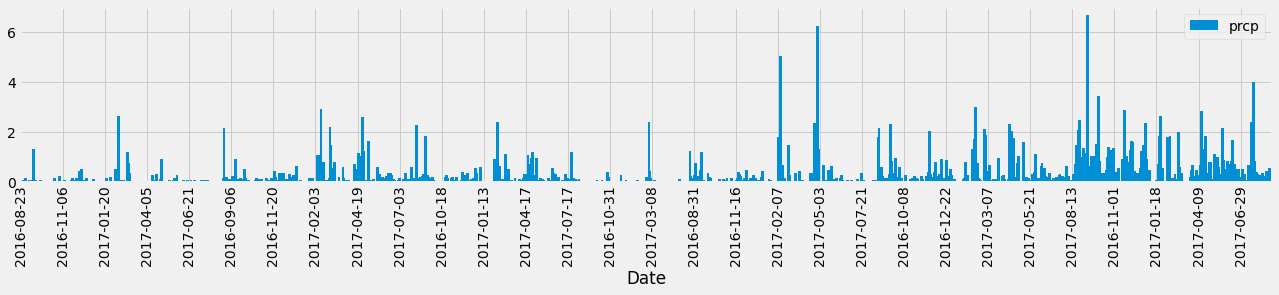

In [79]:
# Use Pandas Plotting with Matplotlib to plot the data
barplot = df.plot(kind = 'bar', figsize=(20,3), width = 5)
plt.locator_params(axis="x", nbins=30)
plt.show()


In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
#used https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html
df["prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()